In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
from bayes_traj.pyro_helper import *

torch.set_default_dtype(torch.double)

# Read toy data and plot

In [3]:
df = pd.read_csv('2d_gaussian_3_visits_std-0.05.csv')
preds = ['intercept', 'age']
targets = ['y1']

Color-code data based on ground-truth trajectory assignment ('traj_gt')

Text(0, 0.5, 'y1')

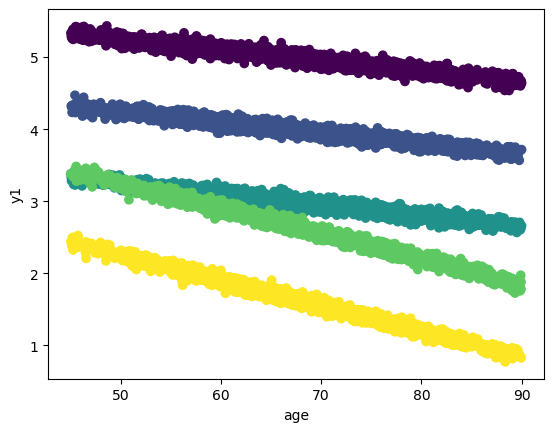

In [4]:
plt.scatter(df['age'], df['y1'], c=df['traj_gt'])
plt.xlabel('age')
plt.ylabel('y1')

# Fit to data

In [28]:
!bayes_traj_main --in_csv 2d_gaussian_3_visits_std-0.05.csv --targets y1 --groupby id --prior 2d_gaussians_3_visits_std-0.05_prior.p --verbose --iters 4000 --repeats 1 --use_pyro -k 8 --out_model foo_pyro.pt

Reading prior...
Reading data...
Fitting...
step    0 loss = 577.533
step  100 loss = 1562.817
step  200 loss = 860.129
step  300 loss = 383.908
step  400 loss = 202.032
step  500 loss = 144.785
step  600 loss = 317.896
step  700 loss = 178.342
step  800 loss = 148.018
step  900 loss = 132.147
step 1000 loss = 199.239
step 1100 loss = 161.936
step 1200 loss = 67.014
step 1300 loss = 73.737
step 1400 loss = 41.047
step 1500 loss = 68.689
step 1600 loss = 88.209
step 1700 loss = 47.095
step 1800 loss = 50.987
step 1900 loss = 62.786
step 2000 loss = 41.810
step 2100 loss = 32.821
step 2200 loss = 26.456
step 2300 loss = 24.129
step 2400 loss = 26.925
step 2500 loss = 20.993
step 2600 loss = 22.076
step 2700 loss = 19.477
step 2800 loss = 11.545
step 2900 loss = 22.067
step 3000 loss = 14.294
step 3100 loss = 18.677
step 3200 loss = 5.779
step 3300 loss = 5.574
step 3400 loss = 9.017
step 3500 loss = 13.590
step 3600 loss = 7.223
step 3700 loss = 3.113
step 3800 loss = 4.303
step 3900 los

# Inspect fit

In [29]:
model = torch.load('foo_pyro.pt')

In [30]:
model.alpha0

tensor([100., 100., 100., 100., 100., 100., 100., 100.])

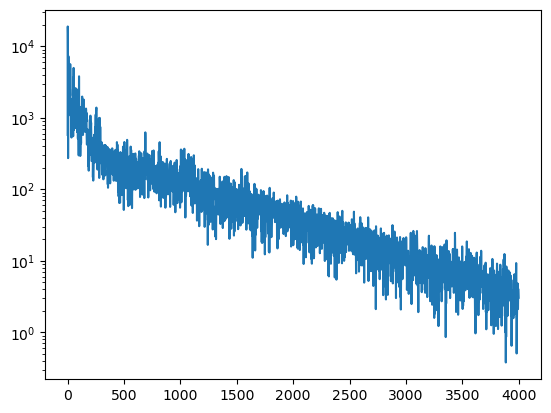

In [31]:
plt.plot(model.losses)
plt.yscale('log')

In [32]:
X_re, X_mask, Y_re, Y_mask, _, _ = get_restructured_data(df, preds, targets, 'id')
print(X_re.shape)
print(Y_re.shape)
print(Y_mask.shape)

torch.Size([3, 3000, 2])
torch.Size([3, 3000, 1])
torch.Size([3, 3000])


In [33]:
probs = model.classify(X_re, Y_real=Y_re, Y_real_mask=Y_mask)

In [34]:
print(probs)

tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]])


Overlap trajectories with data to inspect fit:

In [35]:
np.sum(probs.numpy(),0)

array([442.44, 600.  ,  16.09, 663.5 , 520.41, 152.73,   4.83, 600.  ])

In [36]:
np.argmax(probs.numpy(), axis=1)

array([7, 7, 7, ..., 1, 1, 1])

In [39]:
df['traj_gt']

0       1
1       1
2       1
3       1
4       1
       ..
8995    5
8996    5
8997    5
8998    5
8999    5
Name: traj_gt, Length: 9000, dtype: int64

In [37]:
model.estimate_params()

{'W_mu': tensor([[[ 4.9070, -0.0133]],
 
         [[ 4.4143, -0.0416]],
 
         [[ 5.1587, -0.0324]],
 
         [[ 4.0234, -0.0156]],
 
         [[ 4.9454, -0.0361]],
 
         [[ 5.1934, -0.0186]],
 
         [[ 5.2555, -0.0220]],
 
         [[ 5.9991, -0.0154]]]),
 'W_var': tensor([[[1.2039e-05, 2.3210e-08]],
 
         [[1.0918e-06, 3.5970e-09]],
 
         [[4.7642e-03, 4.1213e-07]],
 
         [[6.6587e-05, 1.7717e-08]],
 
         [[1.2486e-04, 2.2132e-08]],
 
         [[2.4183e-04, 5.3783e-08]],
 
         [[3.0860e-04, 2.2283e-07]],
 
         [[3.7412e-05, 1.2331e-08]]]),
 'lambda_mu': tensor([[399.5559],
         [400.3249],
         [400.0393],
         [399.8011],
         [399.6832],
         [399.6449],
         [399.8261],
         [400.1453]]),
 'lambda_var': tensor([[8.7883e-05],
         [1.5336e-04],
         [3.7701e-04],
         [2.5995e-04],
         [2.1551e-04],
         [9.7062e-04],
         [3.2414e-03],
         [1.5744e-03]])}

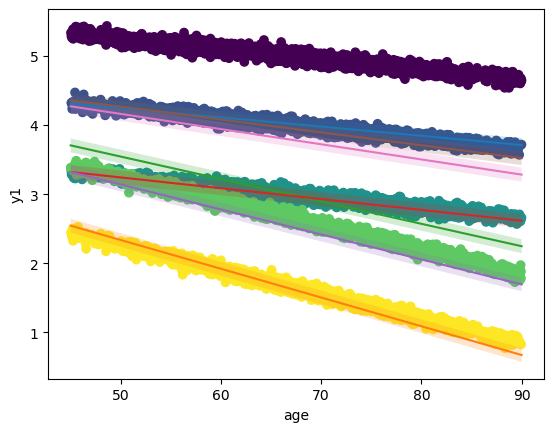

In [38]:
plt.close('all')


plt.scatter(df['age'], df['y1'], c=df['traj_gt'])
#plt.scatter(df['age'], df['y1'], c=np.argmax(probs.numpy(), axis=1))
plt.xlabel('age')
plt.ylabel('y1')

#self.guide.median()

#self.guide() # Dictionary (Draws a sample)

K = 7
X = torch.ones([100, 2])
X[:, 1] = torch.linspace(45, 90, 100)
for kk in range(K):
    #w = model.params['params']['AutoNormal.locs.W_'][kk, 0].data.numpy()
    #(model.estimate_params()['lambda_mu']).rsqrt().numpy()
    #lambda_ = model.params['params']['AutoNormal.locs.lambda_'][kk].data
    stddev = (model.estimate_params()['lambda_mu']).rsqrt().numpy()[kk]
    w = (model.estimate_params()['W_mu']).numpy()[kk,0]
    
    y1_tmp = np.dot(X.numpy(), w.T)
    plt.plot(X[:, 1], y1_tmp)
    lb = y1_tmp - 2*stddev
    ub = y1_tmp + 2*stddev
    plt.fill_between(X[:, 1], lb, ub, alpha=0.2)
plt.show()

In [21]:
1/np.sqrt(lambda_.item())


0.4087097075189758

In [22]:
print(model.params['params'])

{'AutoNormal.locs.class_probs': Parameter containing:
tensor([ 0.1484, -0.0226,  0.0086, -0.2148], requires_grad=True), 'AutoNormal.scales.class_probs': Parameter containing:
tensor([-4.5952, -4.5952, -4.6052, -4.5952], requires_grad=True), 'AutoNormal.locs.W_': Parameter containing:
tensor([[[ 5.2234, -0.0233]],

        [[ 5.4480, -0.0324]],

        [[ 4.3478, -0.0417]],

        [[ 6.4087, -0.0357]],

        [[ 6.2381, -0.0309]]], requires_grad=True), 'AutoNormal.scales.W_': Parameter containing:
tensor([[[-4.5952, -4.5952]],

        [[-4.5952, -4.5952]],

        [[-4.5952, -4.5952]],

        [[-4.5952, -4.6052]],

        [[-4.6052, -4.5952]]], requires_grad=True), 'AutoNormal.locs.lambda_': Parameter containing:
tensor([[5.9865],
        [5.9965],
        [5.9864],
        [5.9965],
        [5.9865]], requires_grad=True), 'AutoNormal.scales.lambda_': Parameter containing:
tensor([[-4.6052],
        [-4.6052],
        [-4.6052],
        [-4.6052],
        [-4.6052]], requires_